# Let's build an app that would help gardeners make data-driven decisions

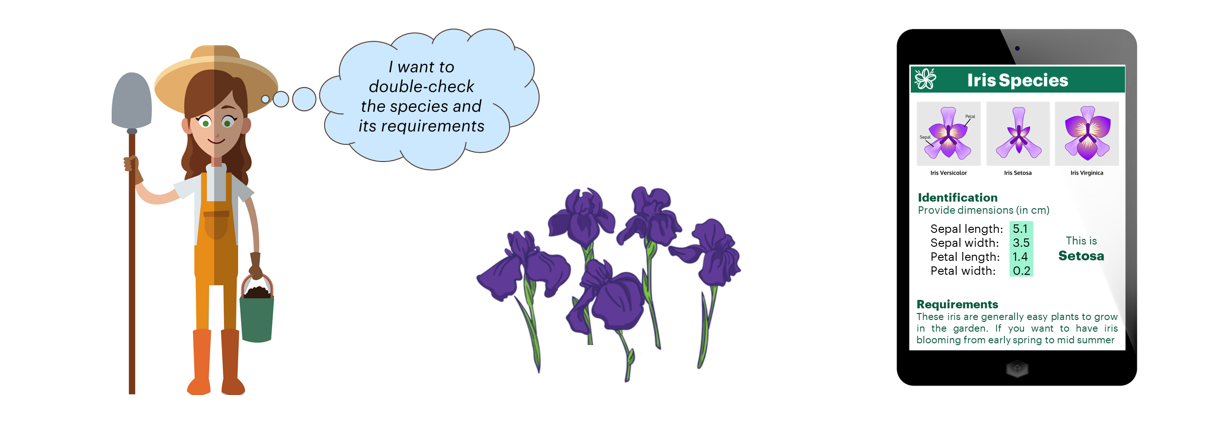

### The core of the application is a machine learning model, that based on dimensions of a sepal and a petal predicts Iris species: **setosa, versicolor, virginica**

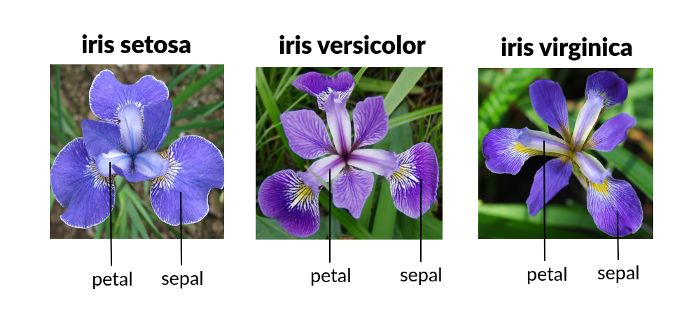

## Classification model for Iris species

In [ ]:
from sklearn import datasets
import pandas as pd

In [ ]:
# import some data to play with
iris = datasets.load_iris(as_frame=True)

In [ ]:
iris.frame

In [ ]:
iris.target_names

In [ ]:
print(iris.DESCR)

In [ ]:
iris.frame.describe()

### Simple visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")

g = sns.pairplot(iris.frame, hue='target', markers='o')
plt.show()

### Model training

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = iris.frame.drop(['target'], axis=1)
y = iris.frame['target']

In [ ]:
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
logreg.predict([[4.300000,2.000000,1.000000,0.100000]])

### Let's make it more user-friendly

In [ ]:
# Provide dimensions
sepal_length = 4.3
sepal_width = 2.0
petal_length = 1.0
petal_width = 0.1

# Make prediction
dimensions = [sepal_length,
              sepal_width,
              petal_length,
              petal_width]

prediction = logreg.predict([dimensions])[0]

# Make prediction readible for a human
iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

human_readible_prediction = iris_dict[prediction]

# Give the output
print(f"This is {human_readible_prediction}")

### ...a function

In [ ]:
def predict_iris_species(sepal_length,
                         sepal_width,
                         petal_length,
                         petal_width):
    # Make prediction
    dimensions = [sepal_length,
                  sepal_width,
                  petal_length,
                  petal_width]

    prediction = logreg.predict([dimensions])[0]

    # Make prediction readible for a human
    iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

    human_readible_prediction = iris_dict[prediction]

    # Give the output
    print(f"This is {human_readible_prediction}")
    return human_readible_prediction

In [ ]:
# Provide dimensions
sepal_length = 4.3
sepal_width = 2.0
petal_length = 1.0
petal_width = 0.1

predict_iris_species(sepal_length,
                     sepal_width,
                     petal_length,
                     petal_width)

## Model persistence (saving)

Format:
* Joblib
* Pickle
* PMML (Predictive Model Markup Language)
* ONNX (Open Neural Network Exchange)
* deep learning framework-specific

Links:
* Joblib and Pickle: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
* PMML: https://pypi.org/project/sklearn-pmml-model/
* ONNX: https://onnx.ai/, https://pytorch.org/tutorials/advanced/super_resolution_with_onnxruntime.html 
* DL framework-specific: https://pytorch.org/tutorials/beginner/saving_loading_models.html, https://www.tensorflow.org/tutorials/keras/save_and_load 

In [ ]:
from joblib import dump, load
dump(logreg, 'iris_model.joblib')

# A standalone function with the model

In [ ]:
def load_model_and_predict_iris_species(sepal_length,
                                        sepal_width,
                                        petal_length,
                                        petal_width,
                                        model = "iris_model.joblib"):
    # Load model
    logreg = load(model)
    # Make prediction
    dimensions = [sepal_length,
                  sepal_width,
                  petal_length,
                  petal_width]

    prediction = logreg.predict([dimensions])[0]

    # Make prediction readible for a human
    iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

    human_readible_prediction = iris_dict[prediction]

    return human_readible_prediction

In [ ]:
load_model_and_predict_iris_species(sepal_length,
                                    sepal_width,
                                    petal_length,
                                    petal_width)

## A class

In [ ]:
class IrisModel:
    def __init__(self, model = "iris_model.joblib"):
        self.model = model
        self.logreg = load(self.model)
        
    def predict(self, sepal_length, sepal_width, petal_length, petal_width):
        dimensions = [sepal_length,
                      sepal_width,
                      petal_length,
                      petal_width]
    
        prediction = self.logreg.predict([dimensions])[0]
    
        # Make prediction readible for a human
        iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
        human_readible_prediction = iris_dict[prediction]        
        
        return human_readible_prediction

In [ ]:
# Create instance of IrisModel class
my_iris = IrisModel()

In [ ]:
# Provide dimensions
sepal_length = 4.3
sepal_width = 2.0
petal_length = 1.0
petal_width = 0.1

In [ ]:
# Make prediction
my_iris.predict(sepal_length, sepal_width, petal_length, petal_width)

## Compare compute time

In [ ]:
%timeit load_model_and_predict_iris_species(sepal_length, sepal_width, petal_length, petal_width)

In [ ]:
%timeit my_iris.predict(sepal_length, sepal_width, petal_length, petal_width)